# Homework 8: Problems
### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17


## Problem 1: Principal Component Analysis

PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

For more details, see Homework 1 - this is the same data sample.  

Read the data, run PCA (with four components), and then

a) plot P2 vs. P1 diagram, color-coded using P3 and P4 as in Homework 1. 
From Homework 1, retain the g-i vs. u-g and amplitude vs. logP diagrams, 
color-coded by the u-g and g-i colors, for visual comparison. Comment
what insights, if any, did PCA analysis bring. 

b) plot the g-i vs. u-g, amplitude vs. logP, P2 vs. P1 and P4 vs. P3 diagrams, 
color-coded using P1 and P2. Comment what insights, if any, did PCA analysis bring. 


## Problem 2: Regression and age-color relation for asteroids

We will use age and color data for asteroid families shown in figure 1 from the paper "An age–colour relationship for main-belt S-complex asteroids" by Jedicke et al. (2004, Nature 429, 275), see http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

Given these y(x) data (see below), with errors in both x and y, 
adapt the code introduced in 
[the last lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-8-Thu.ipynb) 
by modifying the parabola (y(x) = a + b*x + c*x^2) fitter to fit instead
the following function

$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

Important: here x is time, not log(time)! But when you plot, use log(time)
for x axis (see data below).

a) What are the the best-fit values and standard errors for 
parameters a, b, c and d? 

b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 

<br>
# Homework 1: Solutions

### Some useful definitions and functions

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_geneva
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

Let's define a few more useful functions:

In [31]:
def black_bg_subplot(*args, **kwargs):
# copied from http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html
    """Create a subplot with black background"""
    kwargs['facecolor'] = 'k'
    ax = plt.subplot(*args, **kwargs)

    # set ticks and labels to white
    for spine in ax.spines.values():
        spine.set_color('w')

    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        for child in tick.get_children():
            child.set_color('w')

    return ax

In [32]:
def compute_color2(vec1, vec2, kG=5.0, aG=0.8, kB=2.0, aB=1.2):
# adopted from http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html
    """
    Compute the scatter-plot color using code adapted from astroML
    http://www.astroml.org/book_figures/chapter1/fig_moving_objects_multicolor.html
    """
    # define the base color scalings
    # fudge factors aG and aB control the "redness" and "greenness"
    # fudge factors kG and kB control dynamic range of color coding
    # both a and k factors need some experimenting for the best results
    R = np.ones_like(vec1)
    G = aG * 10**(kG*vec1) 
    B = aB * 10**(kB*vec2) 

    # normalize color of each point to its maximum component
    RGB = np.vstack([R, G, B])
    RGB /= RGB.max(0)

    # return an array of RGB colors, which is shape (n_points, 3)
    return RGB.T

## Problem 1

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [22]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']

In [23]:
# first plot diagrams as in HW #1
ugNorm = (ug-1.5)/(3.0-0.0)
giNorm = (gi-0.5)/(2.5+1.0)
color = compute_color2(ugNorm, giNorm, 5.0, 0.8, 2.0, 1.2)

# set up the plot
fig = plt.figure(figsize=(9, 7), facecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2,
                    bottom=0.1, top=0.93)

# plot the color-color plot
ax1 = black_bg_subplot(221)
ax1.scatter(ug, gi, c=color, s=0.9, lw=0)
ax1.set_xlim(0.0, 3.0)
ax1.set_ylim(-1.0, 2.5)
ax1.set_xlabel(r'${\rm u-g}$', color='w')
ax1.set_ylabel(r'${\rm g-i}$', color='w')

# plot the A vs. logP plot
ax2 = black_bg_subplot(222)
ax2.scatter(logP, A, c=color, s=0.9, lw=0)
ax2.set_xlim(-1.5, 0.5)
ax2.set_ylim(0.0, 1.5)
ax2.set_xlabel(r'${\rm logP \, (days)}$', color='w')
ax2.set_ylabel(r'${\rm Amplitude \,\, (mag)}$', color='w')

And then do the PCA analysis...

In [34]:
from sklearn.decomposition import PCA
X = np.column_stack((ug, gi, logP, A))
pca = PCA(n_components=4, whiten=False)  
pca.fit(X)  # call the work horse 
## now figure out how to get PC1-PC4...

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


Now compute RGB color based on P3 and P4, etc...

## Problem 2

These age and color data for asteroid families are taken
from the paper Jedicke et al. (2004, Nature 429, 275), see fig. 1 in http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf



In [12]:
# Age is measured in 10^6 yrs (Myr)
# Log10(age) and error (of Log(Age))
logAge = np.asarray([3.398, 2.477, 3.398, 3.477, 3.301, 1.699, 2.699, 0.763,
         2.301, 3.079,  3.176, 0.398])
LageErr = np.asarray([0.087, 0.145, 0.174, 0.145, 0.109, 0.347, 0.174, 0.015,
          0.217, 0.145, 0.145, 0.434])
# SDSS principal asteroid color PC1 and its error (per family)
PC1 = np.asarray([0.620, 0.476, 0.523, 0.582, 0.460, 0.479, 0.432, 0.351, 
       0.427, 0.522, 0.532, 0.311])
PC1err = np.asarray([0.005, 0.015, 0.007, 0.011, 0.005, 0.032, 0.033, 0.047,
        0.021, 0.015, 0.022, 0.027])
# time/age on linear axes
age = 10**logAge
# and standard error propagation (although errors can be large)
ageErr = age * LageErr * np.log(10)
# set ageErr to 1000 years for all data points
# ageErr = 0.001 + 0*ageErr

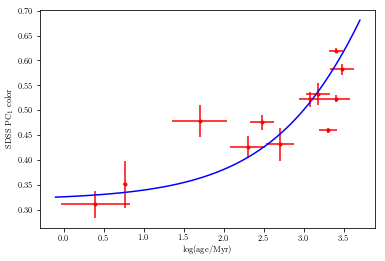

In [13]:
# let's take a quick look at the data to verify that it looks
# similar to fig. 1 from Jedicke et al. 
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='Observed')
plt.show() 

In [14]:
### now let's redo doMCMCparabola from the lecture to be able to fit instead
### y = a + b*[1-exp(-(x/c)^d)]  
import pymc as pymc
from astroML.plotting.mcmc import plot_mcmc